<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#1.1-Найдем-длину-токсичных-и-нетоксичных-комментариев" data-toc-modified-id="1.1-Найдем-длину-токсичных-и-нетоксичных-комментариев-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1 Найдем длину токсичных и нетоксичных комментариев</a></span></li><li><span><a href="#1.2-Лемматизируем-текст" data-toc-modified-id="1.2-Лемматизируем-текст-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2 Лемматизируем текст</a></span></li><li><span><a href="#1.3-Построим-мешок-слов-по-классам-и-определим-наиболее-характерные-слова-для---каждого-класса" data-toc-modified-id="1.3-Построим-мешок-слов-по-классам-и-определим-наиболее-характерные-слова-для---каждого-класса-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>1.3 Построим мешок слов по классам и определим наиболее характерные слова для   каждого класса</a></span></li><li><span><a href="#Вывод-1." data-toc-modified-id="Вывод-1.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод 1.</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#2.1-Логистическая-регрессия" data-toc-modified-id="2.1-Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1 Логистическая регрессия</a></span></li><li><span><a href="#2.2-Решающее-дерево" data-toc-modified-id="2.2-Решающее-дерево-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 Решающее дерево</a></span></li><li><span><a href="#2.3-Случайный-лес" data-toc-modified-id="2.3-Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3 Случайный лес</a></span></li><li><span><a href="#2.4-Проверка-модели" data-toc-modified-id="2.4-Проверка-модели-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>2.4 Проверка модели</a></span></li><li><span><a href="#Вывод-2." data-toc-modified-id="Вывод-2.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод 2.</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [ ]:
# from google.colab import drive  
# drive.mount('/content/drive')

In [1]:
# загрузим нужные библиотеки
import os
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from nltk import word_tokenize, sent_tokenize, FreqDist
from collections import defaultdict, Counter
import string
import requests
from sklearn.feature_extraction.text import CountVectorizer



[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Хорошо, у тебя есть основная информация о проекте и ты вынесла все библиотеки в первую ячейку. 
</div>
<div class="alert alert-block alert-danger">

❌ Аккуратнее с колабом, в данный момент твой проект падает на первой ячейке и на всех тех, где ты используешь %%time(я поправил чтобы можно было запустить и вернул обратно).   
</div>


In [2]:
# откроем файл
pth1 = '/content/drive/MyDrive/Colab Notebooks/машинное обучение для текстов_проект для викишоп/toxic_comments.csv'
pth2 = '/datasets/toxic_comments.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Хороший вариант загрузки данных.
</div>

In [3]:
# выведем первые 5 строк
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
# посмотрим информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [5]:
# найдем уникальные значения для столбца "toxic", который будет у нас целевым признаком
data.toxic.value_counts()

0    143346
1     16225
Name: toxic, dtype: int64

налицо дисбаланс классов

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Молодец, что нашла дисбаланс, эту информацию нужно учитывать при выборе метрик и стратегии обучения.
</div>

In [6]:
df = pd.DataFrame(data)

In [7]:
# переведем текст в нижний регистр
df['text'] = df['text'].str.lower()

### 1.1 Найдем длину токсичных и нетоксичных комментариев

In [8]:
df['length'] = df['text'].apply(len)

In [9]:
df.head()

,text,toxic,length
0,explanation\nwhy the edits made under my usern...,0,264
1,d'aww! he matches this background colour i'm s...,0,112
2,"hey man, i'm really not trying to edit war. it...",0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,622
4,"you, sir, are my hero. any chance you remember...",0,67


In [10]:
# сделаем срезы по токсичным и нетоксичным комментариям
toxic = df[df['toxic'] == 1]
nontoxic = df[df['toxic'] != 1]

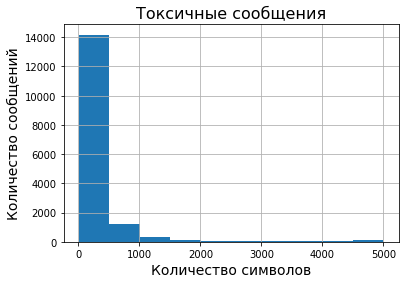

In [11]:
# построим гистограммы
toxic.length.hist()
plt.xlabel('Количество символов', fontsize=14)
plt.ylabel('Количество сообщений', fontsize=14)
plt.title('Токсичные сообщения', fontsize=16)
plt.show()

In [12]:
toxic.head()

,text,toxic,length
6,cocksucker before you piss around on my work,1,44
12,hey... what is it..\n@ | talk .\nwhat is it......,1,319
16,"bye! \n\ndon't look, come or think of comming ...",1,57
42,you are gay or antisemmitian? \n\narchangel wh...,1,648
43,"fuck your filthy mother in the ass, dry!",1,40


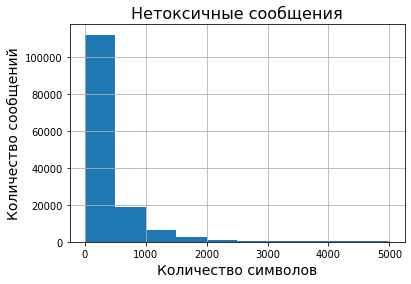

In [13]:
nontoxic.length.hist()
plt.xlabel('Количество символов', fontsize=14)
plt.ylabel('Количество сообщений', fontsize=14)
plt.title('Нетоксичные сообщения', fontsize=16)
plt.show()

По гистограммам видно, что распределение токсичных и нетоксичных комментариев по длине примерно одинаковое, значит длина комментария не влияет на его токсичность. Таким образом, длина сообщения не может служить дополнительным признаком, который можно использовать для классификации.

### 1.2 Лемматизируем текст

In [14]:
# инициализируем Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [15]:
# напишем функцию для pos-тегов - маркировки частей речи
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
# Lemmatize corpus with the appropriate POS tag
# print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(lem(clear_text(corpus[0])))])

In [16]:
# напишем функцию для очистки и лемматизации текста с маркированными частями речи
def clear_text(text):
    reg = re.sub(r'[^a-zA-Z]', ' ', text)
    clear = reg.split() 
    lemm = []
    # в цикле лемматизируем очищенный текст
    for i in range(len(clear)):
      lemm.append(lemmatizer.lemmatize(clear[i], get_wordnet_pos(clear[i])))
    return " ".join(lemm)

In [17]:
# применим функцию к столбцу "текст" и создадим столбец с лемматризированным текстом
# %%time
df['lemmatized_text'] = df['text'].apply(clear_text)

In [18]:
# посмотрим, что получилось
df.head()

,text,toxic,length,lemmatized_text
0,explanation\nwhy the edits made under my usern...,0,264,explanation why the edits make under my userna...
1,d'aww! he matches this background colour i'm s...,0,112,d aww he match this background colour i m seem...
2,"hey man, i'm really not trying to edit war. it...",0,233,hey man i m really not try to edit war it s ju...
3,"""\nmore\ni can't make any real suggestions on ...",0,622,more i can t make any real suggestion on impro...
4,"you, sir, are my hero. any chance you remember...",0,67,you sir be my hero any chance you remember wha...


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Ого, очень редко студент правильно реализует лемматизацию с помощью WordNetLemmatizer, у тебя это получилось. Молодец, что проверяешь результат лемматизации, это помогает уберечься от ошибок.
</div>

### 1.3 Построим мешок слов по классам и определим наиболее характерные слова для   каждого класса

In [19]:
# сделаем срез по токсичным комментариям
toxic_lem = df[df['toxic'] ==1]

In [20]:
toxic_lem.head()

,text,toxic,length,lemmatized_text
6,cocksucker before you piss around on my work,1,44,cocksucker before you piss around on my work
12,hey... what is it..\n@ | talk .\nwhat is it......,1,319,hey what be it talk what be it an exclusive gr...
16,"bye! \n\ndon't look, come or think of comming ...",1,57,bye don t look come or think of comming back t...
42,you are gay or antisemmitian? \n\narchangel wh...,1,648,you be gay or antisemmitian archangel white ti...
43,"fuck your filthy mother in the ass, dry!",1,40,fuck your filthy mother in the as dry


In [44]:
corpus = list(toxic_lem['lemmatized_text'])

# чтобы почистить мешок слов, найдём стоп-слова, то есть слова без смысловой нагрузки.
stop_words = set(nltk_stopwords.words('english'))

# чтобы преобразовать корпус текстов в мешок слов, обратимся к классу CountVectorizer()
# создадим счетчик: зададим максимальное значение признаков 20 наиболее часто встречающихся слов
# и передадим стоп-слова в счетчик векторов
count_vect = CountVectorizer(max_features=20, stop_words=stop_words)# 

# создадим мешок слов bow, от англ. bag of words.
# передадим счётчику корпус текстов, вызвав функцию fit_transform(). 
# счётчик выделит из корпуса уникальные слова и посчитает количество их вхождений в каждом тексте корпуса.
bow = count_vect.fit_transform(corpus)

In [45]:
# вызовем словарь методом get_feature_names() 
count_vect.get_feature_names() 

['article',
 'bitch',
 'block',
 'die',
 'faggot',
 'fuck',
 'gay',
 'get',
 'go',
 'hate',
 'know',
 'like',
 'make',
 'nigger',
 'page',
 'people',
 'say',
 'shit',
 'suck',
 'wikipedia']

In [35]:
# feat_dict=count_vect.vocabulary_.keys()
# display(feat_dict)

In [40]:
# сделаем срез по нетоксичным комментариям
nontoxic_lem = df[df['toxic'] == 0]

In [41]:
nontoxic_lem.head()

,text,toxic,length,lemmatized_text
0,explanation\nwhy the edits made under my usern...,0,264,explanation why the edits make under my userna...
1,d'aww! he matches this background colour i'm s...,0,112,d aww he match this background colour i m seem...
2,"hey man, i'm really not trying to edit war. it...",0,233,hey man i m really not try to edit war it s ju...
3,"""\nmore\ni can't make any real suggestions on ...",0,622,more i can t make any real suggestion on impro...
4,"you, sir, are my hero. any chance you remember...",0,67,you sir be my hero any chance you remember wha...


In [46]:
# найдем 20 наиболее употребимых слов для корпуса текстов нетоксичных комментариев
corpus = list(nontoxic_lem['lemmatized_text'])
stop_words = set(nltk_stopwords.words('english'))
count_vect = CountVectorizer(max_features=20, stop_words=stop_words)
bow = count_vect.fit_transform(corpus)

In [47]:
count_vect.get_feature_names() 

['add',
 'also',
 'article',
 'edit',
 'get',
 'know',
 'like',
 'make',
 'one',
 'page',
 'please',
 'say',
 'see',
 'source',
 'talk',
 'think',
 'time',
 'use',
 'wikipedia',
 'would']

### Вывод 1.

Мы получили датасет из 160 строк. 
- Проверили распределение токсичных и нетоксичных комментариев по длине и нашли, что оно примерно одинаковое, значит длина комментария не влияет на его токсичность. Таким образом, длина сообщения не может служить дополнительным признаком, который можно использовать для классификации.
- Далее очистили датасет, разметили части речи и лемматизировали, т.е. привели слова к начальным формам. Создали столбец с лемматизированным текстом.
- Построили мешок слов по классам и нашли наиболее употребимые слова для каждого класса.
- Проверили целевой признак на дисбаланс классов и обнаружили дисбаланс. При обучении моделей будем это учитывать.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Отлично, ты проанализировала полученные данные и нашла дисбаланс в распределении целевого признака, так как ты работаешь с текстом, то сюда ещё можно добавить изучение длины комментариев, построение мешка слов по классам и определение наиболее характерных слов для каждого класса.
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*спасибо, я все это сделала, в том числе построила мешок слов по классам и определила наиболее характерные слова. как можно использовать эту информацию?*
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>
    
✔️ Молодец, ты очень сильно улучшила анализ текстовых данных. По длине комментариев можно попробовать найти аномальные данные, рассмотреть несколько длинных, может это ошибка выгрузки данных? Либо использовать эту информацию для оптимизации времени выполнения предобработки, если большинство комментариев короткие, то зачем нам тратить время на лемматизацию текста в несколько тысяч слов.<br>
    
Информацию по самым распространенным словам можно использовать для анализа данных, создания признаков(например: количество слов из `токсичного топа` в тексте). 
</div>

## Обучение

In [48]:
# разделим выборки на обучающую, валидационную и тестовую в пропорции 60%-20%-20%
target = df['toxic']
features = df['lemmatized_text']

#указываем stratify=target, чтобы сохранить соотношение классов при разделении
#сначала разделим на обучающую и тестовую в соотношении 60%-40%
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target) 

#разделим тестовую выборку пополам на тестовую и валидационную
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size=0.50, random_state=12345, stratify=target_test)

<div class="alert alert-warning">

<b>Комментарий от ревьюера v1</b>
   
⚠️ 10% на тест и валидацию - это очень мало. У нас не такой большой дефицит данных, чтобы жертвовать качеством валидации и теста. Обычно разделяют на 60-20-20 и после подбора гиперпараметров валидационную часть можно также использовать для обучения.
        
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*исправила на 60-20-20 (см.выше)*
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>
    
✔️ Хорошо, это правильно, маленькая выборка искажает оценку нашей модели.
</div>

In [49]:
# проверим размер выборок
display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)
display(features_test.shape)
display(target_test.shape)

(95742,)

(95742,)

(31914,)

(31914,)

(31915,)

(31915,)

In [50]:
# проверим выборки на дисбаланс классов
print(target_train.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%')
print(target_valid.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%')
print(target_test.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%')

0    89.8%
1    10.2%
Name: toxic, dtype: object
0    89.8%
1    10.2%
Name: toxic, dtype: object
0    89.8%
1    10.2%
Name: toxic, dtype: object


In [51]:
# найдём стоп-слова, то есть слова без смысловой нагрузки
# для этого вызовем функцию stopwords.words(), передадим ей аргумент
# 'english' для английского языка
stopwords = set(nltk_stopwords.words('english'))

# при создании счётчика передадим список стоп-слов в счётчик tfidf():
count_tf_idf = TfidfVectorizer(stop_words=stopwords)

<div class="alert alert-warning">

<b>Комментарий от ревьюера v1</b>
   
⚠️ В комментариях ты пишешь про CountVectorizer, а используешь TfidfVectorizer, это разные методы кодировки текста.
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*спасибо, исправила. а TfidfVectorizer тоже переводит слова в векторы?*
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>
    
✔️ Да, Tf-idf оценивает важность слова. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.
</div>

In [52]:
# переведем слова в векторы и посчитаем tf_idf
'''Оценка важности слова определяется величиной TF-IDF (от англ. term frequency, 
«частота термина, или слова»; inverse document frequency, «обратная частота документа, или текста»). 
То есть TF отвечает за количество упоминаний слова в отдельном тексте, 
а IDF отражает частоту его употребления во всём корпусе.'''
train_tf_idf = count_tf_idf.fit_transform(features_train)
valid_tf_idf = count_tf_idf.transform(features_valid)
test_tf_idf = count_tf_idf.transform(features_test)

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера v1</b>
    
❌ Ты совершенно верно выполнила преобразование текстовых данных, но нам не нужно выполнять .values.astype('U') - это преобразование необходимо для русского текста, в нашем же случае мы просто увеличим количество потребляемой памяти и из-за этого может упасть ядро.
</div>


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*ок, исправила*
</div>

In [53]:
print("Размер матрицы:", train_tf_idf.shape)
print("Размер матрицы:", valid_tf_idf.shape)
print("Размер матрицы:", test_tf_idf.shape)

Размер матрицы: (95742, 110950)
Размер матрицы: (31914, 110950)
Размер матрицы: (31915, 110950)


In [54]:
# pd.DataFrame(test_tf_idf.toarray()) это убило мое ядро

Для определения тональности применим величины TF-IDF как признаки.
Анализ тональности текста, или сентимент-анализ (от англ. sentiment, «настроение»), выявляет эмоционально окрашенные слова. Этот инструмент помогает компаниям оценивать, например, реакцию на запуск нового продукта в интернете. На разбор тысячи отзывов человек потратит несколько часов, а компьютер — пару минут.
Оценить тональность — значит отметить текст как позитивный или негативный. То есть мы решаем задачу классификации, где целевой признак равен «1» для положительного текста и «0» для отрицательного. Признаки — это слова из корпуса и их величины TF-IDF для каждого текста.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Все абсолютно верно, данные готовы к обучению.
</div>

### 2.1 Логистическая регрессия

In [55]:
# обучим модель логистической регрессии, 
# укажем гиперпараметр class_weight='balanced'
# найдем наилучшее значение С
for c in range(1, 10):
    model = LogisticRegression(class_weight='balanced', 
                          random_state=12345, 
                          max_iter=1000, 
                          solver='lbfgs', 
                               C=c)
    # обучим модель на тренировочной выборке
    model.fit(train_tf_idf, target_train)
    # найдем предсказания на валидационной выборке
    predicted_valid = model.predict(valid_tf_idf)
    print ("Значение С:", c)
    # напечатаем значение метрики F1
    print("F1_score:", f1_score(target_valid, predicted_valid))
    print('')
print()

Значение С: 1
F1_score: 0.7466812645408512

Значение С: 2
F1_score: 0.7565229524208177

Значение С: 3
F1_score: 0.7596506058044519

Значение С: 4
F1_score: 0.7605513713230069

Значение С: 5
F1_score: 0.7607326846021751

Значение С: 6
F1_score: 0.7603567318757192

Значение С: 7
F1_score: 0.7587503615851895

Значение С: 8
F1_score: 0.757830626450116

Значение С: 9
F1_score: 0.7565760790582763




Нашли наилучший гиперпараметр С=5

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Хороший результат, чтобы его улучшить можно попробовать подобрать гиперпараметр C.
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*попробовала*
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>
    
✔️ Обычно С подбирается в диапозоне [0.01, 0.1, 1, 10] и потом уточняется.
</div>

### 2.2 Решающее дерево

In [56]:
# обучим модель решающего дерева для классификации и подберем наилучшую глубину
# %%time
for depth in range(2, 20, 2):
    #создадим модель, указав max_depth=depth
    model = DecisionTreeClassifier(random_state=12345, 
                                  max_depth=depth,
                                  class_weight='balanced')
    #обучим модель
    model.fit(train_tf_idf, target_train)
    predicted_valid = model.predict(valid_tf_idf)
    print('Глубина:', depth)
    print("F1_score:", f1_score(target_valid, predicted_valid))    
    print('')
print()

Глубина: 2
F1_score: 0.36952191235059767

Глубина: 4
F1_score: 0.4741044946383756

Глубина: 6
F1_score: 0.5511411665257819

Глубина: 8
F1_score: 0.5666041275797373

Глубина: 10
F1_score: 0.5937248592115849

Глубина: 12
F1_score: 0.601032307398203

Глубина: 14
F1_score: 0.6135321100917431

Глубина: 16
F1_score: 0.6232073011734028

Глубина: 18
F1_score: 0.6266395714021799




<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Деревья обычно не могут справиться с таким большим количеством признаков.
</div>

### 2.3 Случайный лес

In [57]:
# построим модель случайного леса для регрессии с подбором наилучших гиперпараметров
# найдем наилучшую глубину дерева
# %%time
for depth in range(3, 20, 3):
    model = RandomForestClassifier(random_state=12345, 
                                   max_depth = depth, 
                                   class_weight='balanced')
    model.fit(train_tf_idf, target_train)
    predicted_valid = model.predict(valid_tf_idf)
    print('Глубина:', depth)
    print("F1_score:", f1_score(target_valid, predicted_valid))    
    print('')
print()

Глубина: 3
F1_score: 0.323419432779152

Глубина: 6
F1_score: 0.3338494521200572

Глубина: 9
F1_score: 0.3575618464677378

Глубина: 12
F1_score: 0.36843508397760594

Глубина: 15
F1_score: 0.38802614011664677

Глубина: 18
F1_score: 0.39956076134699847




Модель склонна к переобучению, поэтому ограничим глубину дерева 9

In [58]:
# найдем наилучшее количество деревьев
# %%time
for est in [100, 500, 1000]:
    model = RandomForestClassifier(random_state=12345, 
                                   n_estimators=est, 
                                   max_depth=9,
                                   class_weight='balanced')
    model.fit(train_tf_idf, target_train)
    predicted_valid = model.predict(valid_tf_idf)
    print('Количество деревьев:', est)
    print("F1_score:", f1_score(target_valid, predicted_valid))    
    print('')
print()

Количество деревьев: 100
F1_score: 0.3575618464677378

Количество деревьев: 500
F1_score: 0.36800938599921784

Количество деревьев: 1000
F1_score: 0.3722372501154583




Лучший результат метрики F1 показала модель логистической регрессии. Проверим ее на тестовой выборке.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Ты хорошо поработала с обучением моделей и было бы хорошо, если бы ты попробовала добавить сюда бустинговую модель, например catboost умеет обрабатывать текстовые признаки, достаточно передать в него лемматизированный текст и информацию о том, что признак текстовый. 
</div>

### 2.4 Проверка модели

In [59]:
model = LogisticRegression(class_weight='balanced', 
                          random_state=12345, 
                          max_iter=1000, 
                          solver='lbfgs',
                          C=5)
# объединим тренировочную и валидационную выборки
features_train_lr = pd.concat([features_train, features_valid])
target_train_lr = pd.concat([target_train, target_valid])

features_train_tf_idf = count_tf_idf.fit_transform(features_train_lr)
features_test_tf_idf = count_tf_idf.transform(features_test)
# обучим модель на тренировочной выборке
model.fit(features_train_tf_idf, target_train_lr)

# найдем предсказания на тестовой выборке
predicted_test = model.predict(features_test_tf_idf)

# выведем результат F1
print("F1_score:", f1_score(target_test, predicted_test))

F1_score: 0.7637231503579952


In [60]:
display(features_test_tf_idf.shape)
display(features_train_tf_idf.shape)

(31915, 132326)

(127656, 132326)

### Вывод 2. 

При обучении моделей наилучший результат показала модель логистической регрессии. Значение F1-меры на тестовой выборке - 0,76.
Сводная таблица моделей:

In [61]:
tabledata = [["логистическая регрессия", 0.76],
         ["решающее дерево", 0.60],
         ["случайный лес", 0.35]]
print("Обучение моделей для классифиции комментарии на позитивные и негативные")
df= pd.DataFrame(tabledata, columns=["модель","F1-мера"])
df = df.set_index('модель')
df.index.names = [None]
df

Обучение моделей для классифиции комментарии на позитивные и негативные


,F1-мера
логистическая регрессия,0.76
решающее дерево,0.60
случайный лес,0.35


<div class="alert alert-warning">

<b>Комментарий от ревьюера v1</b>
   
⚠️ Лучше сначала создать итоговую таблицу и заполнять её по ходу обучения моделей. При ручной сборке очень легко ошибиться, особенно, если бы у тебя было много вариантов обучения.
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Не совсем поняла, как создать итоговую таблицу и заполнять по ходу обучения. Это значит, что данные будут автоматически заноситься в нее по ходу обучения моделей? Подскажи пожалуйста, как это реализовать.*
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Смотри
    
    df= pd.DataFrame(columns=["модель","F1-мера"])   <- Создаем таблицу
                                                        
    dict_to_add = {'модель' : model_name,
                    'F1-мера' : metric}           <- Словарь, который будем использовать для записи в таблицу
    
    df.append(dict_to_add, ignore_index=True)   <- Записываем данные в таблицу.
</div>







## Выводы

1. Мы получили датасет из 160 строк. 
- Проверили распределение токсичных и нетоксичных комментариев по длине и нашли, что оно примерно одинаковое, значит длина комментария не влияет на его токсичность. Таким образом, длина сообщения не может служить дополнительным признаком, который можно использовать для классификации.
- Далее очистили датасет, разметили части речи и лемматизировали, т.е. привели слова к начальным формам. Создали столбец с лемматизированным текстом.
- Построили мешок слов по классам и нашли наиболее употребимые слова для каждого класса.
- Проверили целевой признак на дисбаланс классов и обнаружили дисбаланс. При обучении моделей будем это учитывать.

2. При обучении моделей с подбором гиперпараметров наилучший результат показала модель логистической регрессии. Значение F1-меры на тестовой выборке - 0,76.

<div class="alert alert-block alert-success">
Комментарий от ревьюера v1
    
# Общий вывод
    
Спасибо за работу, у тебя получился хороший проект. Ты полностью справилась со всеми техническими сложностями проекта, правильно выполнила предобработку текстовых данных и добилась необходимого значения метрики на тесте.

В своем проекте ты не подбираешь гиперпараметры с помощью GridSearchCV, но если захочешь, то используй Pipeline. Он позволяет объединять предобработку признаков и поиск оптимальных параметров. Тут есть краткий пример того, как можно построить pipeline, он включает предобработку текста. 
    https://scikit-learn.ru/example/sample-pipeline-for-text-feature-extraction-and-evaluation/
 
GridSearchCV и Pipeline:  https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.htm
    
</div>

<div class="alert alert-block alert-danger">
    
❌ <b>Необходимо исправить:</b> 
    
- Твой проект не выполняется на Я.П., попробуй сначала установить google-colab, а потом уже подгружать его в проект;
- Убери преобразование к юникоду .astype('U').    

</div>

Жду твою работу, удачи!

<div class="alert alert-block alert-success">
Комментарий от ревьюера v2
    
Ты поправила все неточности и я готов принять проект. Надеюсь, что смог ответить на твои вопросы, если есть ещё что-то, то задавай, если нет, то возвращай проект и я приму его) 
</div>



<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Спасибо! вопросов больше нет.*
</div>

<div class="alert alert-block alert-success">
Комментарий от ревьюера v3
    
Хорошо, тогда успехов в дальнейшем обучении)
</div>



## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны